<a href="https://colab.research.google.com/github/Nithinsp2001/NLP-/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - loss: 0.3444 - val_loss: 0.1642
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1568 - val_loss: 0.1368
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1358 - val_loss: 0.1269
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1265 - val_loss: 0.1204
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1205 - val_loss: 0.1161
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1162 - val_loss: 0.1114
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1122 - val_loss: 0.1085
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1095 - val_loss: 0.1063
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1071 - val_loss: 0.1049
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.1052 - val_loss: 0.1027
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1036 - val_los

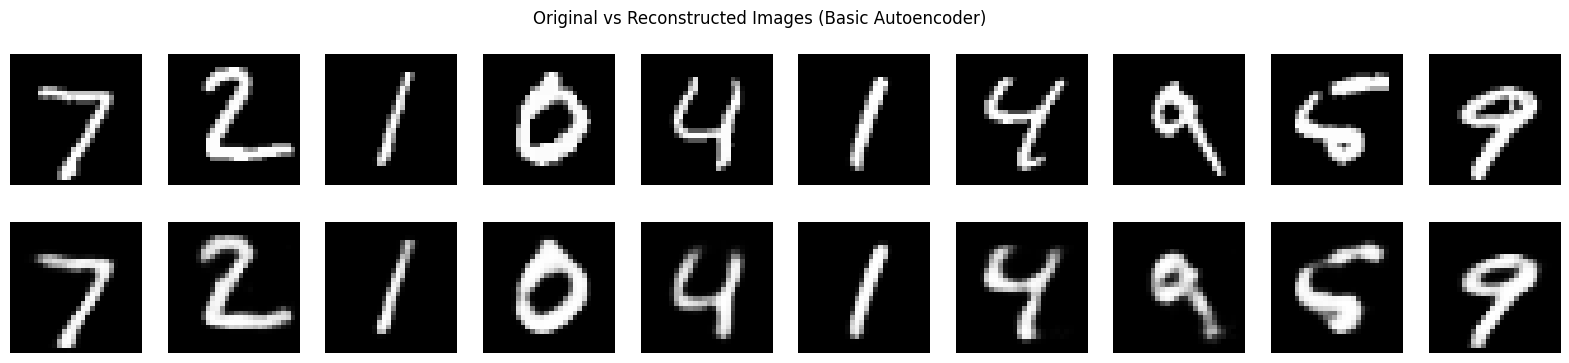

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

# Define autoencoder architecture
input_dim = 28*28
encoding_dim = 32  # size of the bottleneck layer

input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
bottleneck = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)
output_img = Dense(input_dim, activation='sigmoid')(decoded)

# Build autoencoder model
autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encoder model for extracting bottleneck
encoder = Model(input_img, bottleneck)

# Encode and decode some images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Plot original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle("Original vs Reconstructed Images (Basic Autoencoder)")
plt.show()

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - loss: 0.3386 - val_loss: 0.1974
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.1855 - val_loss: 0.1622
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1600 - val_loss: 0.1520
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1504 - val_loss: 0.1444
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - loss: 0.1434 - val_loss: 0.1379
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - loss: 0.1379 - val_loss: 0.1347
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1344 - val_loss: 0.1318
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.1319 - val_loss: 0.1294
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1295 - val_loss: 0.1276
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1274 - val_loss: 0.1264
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1261 - val_loss: 0.1247
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

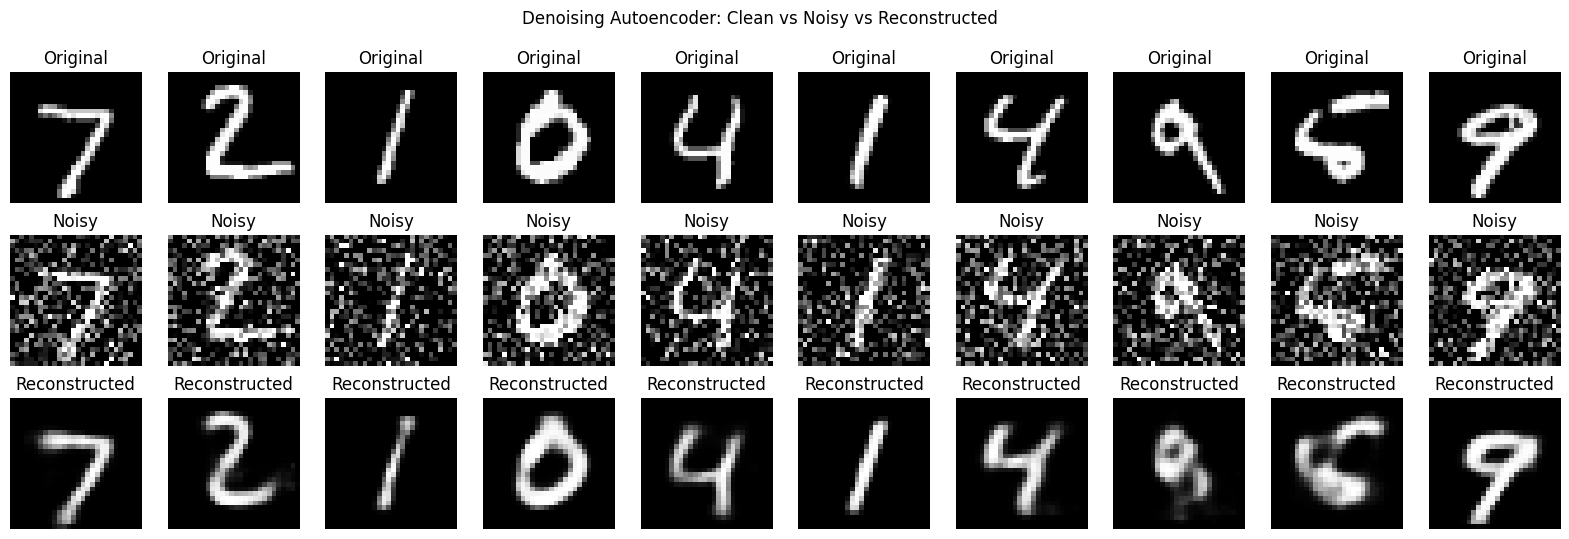

In [2]:
# Add noise to the data
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define autoencoder architecture (same as above)
input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
bottleneck = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)
output_img = Dense(input_dim, activation='sigmoid')(decoded)

# Build denoising autoencoder
denoising_autoencoder = Model(input_img, output_img)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train on noisy inputs to reconstruct clean images
denoising_autoencoder.fit(x_train_noisy, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test))

# Reconstruct images from noisy test set
decoded_noisy_imgs = denoising_autoencoder.predict(x_test_noisy)

# Plot original, noisy, and reconstructed images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original clean images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Reconstructed images from noisy input
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_noisy_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.suptitle("Denoising Autoencoder: Clean vs Noisy vs Reconstructed")
plt.show()